# Gráfico

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

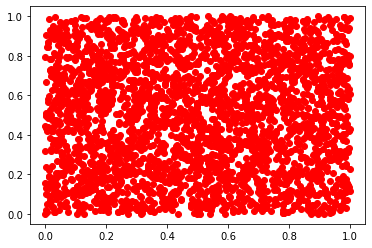

In [2]:
MAX = 3000
a = 16807
c = 0
#M = 1024.
M = 2 ** 31 - 1

i = 0
result = 11
x = []
y = []
lista = []

for i in range(0, MAX):
    anterior = result
    result = ((a * anterior) + c) % M

    x.append(anterior/M)
    y.append(result/M)
        
    lista.append(result/M)

plt.plot(x,y,'ro')
plt.show()


# Média e Desvio padrão

In [3]:
soma = 0

for i in range(0, MAX):
    soma+=lista[i]
media = soma/MAX
print("Media: ", media)
#print(np.average(lista))
print("Desvio padrão: ", np.std(lista))

Media:  0.49714258090242613
Desvio padrão:  0.28644890967719494


# Correlação

In [4]:
somaMultXY = 0
somaX = 0
somaY = 0
somaX2 = 0
somaY2 = 0

for i in range(MAX - 1):
    somaMultXY += x[i] * y[i]
    
    somaX += x[i]
    somaY += y[i]
    
    
    somaX2 += x[i] ** 2
    somaY2 += y[i] ** 2
    
numerador = (MAX * somaMultXY - (somaX * somaY))
denominador = (math.sqrt((MAX * somaX2) - (somaX ** 2))) * (math.sqrt((MAX * somaY2) - (somaY ** 2)))
correlacao = numerador / denominador

print("Correlacao: ", correlacao)

Correlacao:  0.021535966032262325


# Covariância

In [5]:
covariancia = numerador / (MAX * (MAX-1))
print("Covariancia: ", covariancia)

Covariancia:  0.0017702844568387559


# Qui Quadrado

In [6]:
somaQui = 0

intervalos = [[0,0.1],[0.1,0.2],[0.2,0.3],[0.3,0.4],[0.4,0.5],[0.5,0.6],[0.6,0.7],[0.7,0.8],[0.8,0.9],[0.9,1]]
n = []

contag = 0

for i in range(10):
    for j in range(0, MAX):
        if x[j] >= intervalos[i][0] and x[j] < intervalos[i][1]:
            contag += 1
    n.append(contag)
    contag = 0

for i in range(10):
    numerador = (n[i] - (MAX / 10)) ** 2
    denominador = MAX  / 10
    somaQui += numerador / denominador
    
print(f'Qui Quadrado = {somaQui}')

Qui Quadrado = 4.58


# Monte Carlo

In [7]:
a = 3
b = 5

f = []

for i in range(MAX):
    f.append((b-a) * y[i] + a)

# Distribuição Exponencial

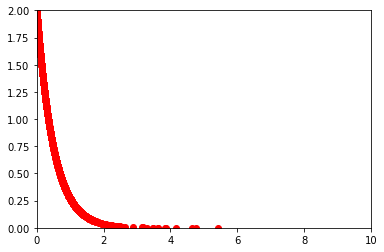

In [8]:
alpha = 1 / media
fdx = []
exp = []
maiorFDX = 0

for i in range(MAX):
    numerador = math.log(y[i])
    
    fdx.append(-1 * (numerador / alpha))
    

for i in range(MAX):
    exp.append(alpha * math.exp(-1 * alpha * fdx[i]))
    
axis = [0,10,0,2]
plt.plot(fdx, exp, 'ro')
plt.axis(axis)
plt.show()

# Weibull

# Erlang

# Monte Carlo Triangular

# Normal

# Poisson

# Simulador